#### Importing Libraries

In [1]:
import cpnet as cpnet
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import powerlaw
from scipy.special import factorial


#### Loading UniSwap Graph

In [2]:
def build_graph():
    df = pd.read_csv("top_1000_by_liquidity.csv")
    G = nx.from_pandas_edgelist(
        df,
        source="token0.symbol",
        target="token1.symbol",
        edge_attr="reserveUSD",
        create_using=nx.Graph().to_undirected(),
    )
    return G


G = build_graph()

#### Computing Graph Properties

In [4]:
def operate_on_graph(g):

    """Operate on Graph

    This function computes the following properties of the network:
        Degree Assortativity, Average Shortest Path Length, Diameter of the graph, and Average Clustering of the Graph

    :param g: networkx graph object
    :return: The respective properties of the network
    """

    g_dac = nx.degree_assortativity_coefficient(g)

    g_aspl = nx.average_shortest_path_length(g)
    g_dia = nx.diameter(g)
    g_clustering = nx.average_clustering(g)
    return g_dac, g_aspl, g_dia, g_clustering


g_dac, g_aspl, g_dia, g_clustering = operate_on_graph(G)

NetworkXError: Graph is not connected.

In [ ]:

print("The assortativity co-efficient of the network is :", g_dac)

In [3]:
def plot_avg_nearest_neighbors_degree(g):
  knn_k = nx.average_degree_connectivity(g)
  plt.figure(figsize=(15,7))
  plt.grid(True, which = 'both', ls="-")
  plt.scatter(knn_k.keys(),knn_k.values(),alpha=0.5)
  plt.xlabel("degree k")
  plt.ylabel("degree $K_{nn}(k)$")
  plt.title(g)
  plt.xscale("log")
  plt.yscale("log")
  plt.show()

In [4]:
def plot_degree_distribution(g):
  degrees = [g.degree(n) for n in g.nodes()]
  sum_of_edges = g.number_of_edges()
  no_of_nodes = g.number_of_nodes()
  avg_degree = sum_of_edges/no_of_nodes
  my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 30 )
  plt.figure(figsize=(15,7))
  plt.hist(degrees, bins = my_bins, density = 'True', ec = 'b')
  plt.axvline(x=avg_degree, color = 'r', label='Avg_Degree')
  plt.legend()
  plt.xlabel("degree")
  plt.ylabel("frequency")
  plt.title(g)
  plt.xscale("log")
  plt.yscale("log")
  plt.show()

In [5]:
def core_periphery_detection(g):
  alg = cpnet.BE()
  alg.detect(g)
  x = alg.get_coreness()
  c = alg.get_pair_id()
  print(x,c)
  fig = plt.figure(figsize=(8,6))
  ax = plt.gca()
  ax, pos = cpnet.draw(g,c,x,ax)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),


{'UETH': 0, 'ULCK': 0, 'WISE': 1, 'WETH': 1, 'USDC': 0, 'DAI': 0, 'USDT': 0, 'DELTA': 1, 'FNK': 0, 'RK:ETH': 0, 'ROOT': 0, 'MC': 1, 'UNI': 1, 'PAXG': 0, 'ETH2POS': 0, 'DC': 0, 'FEI': 0, 'TRIBE': 0, 'FXS': 0, 'FRAX': 0, 'DBL': 0, 'BLUE': 0, 'ELON': 1, 'HANU': 0, 'GOJ': 0, 'MIA': 0, 'XXi': 1, 'vUSD': 0, 'VOW': 0, 'CAW': 1, 'WBTC': 0, 'MT': 0, 'ACR': 0, 'BigSB': 0, 'ASTO': 0, 'M2': 0, 'wPE': 0, 'WAXE': 1, 'SUPER': 0, 'BTT': 0, 'UFO': 0, 'DAPE': 0, 'ULS': 0, 'TERA': 0, 'FOX': 0, 'eXRD': 0, 'FLX': 0, 'HIGH': 0, 'SHINJA': 0, 'RAD': 0, 'STARL': 0, 'ERN': 0, 'DG': 0, 'CULT': 0, 'WOO': 0, 'VOLT': 0, 'BOND': 0, 'SAITAMA': 0, 'O': 0, 'PNK': 0, 'ShibDoge': 0, 'HEZ': 0, 'DFI': 0, 'WILD': 0, 'RAI': 0, 'X2Y2': 0, 'AMPL': 0, 'DOGE': 0, 'FLOKI': 0, 'LINK': 0, 'UNIX': 0, 'SAND': 0, 'LON': 0, 'WDOGE': 0, 'QOM': 0, 'PAX': 0, 'SWFL': 0, 'RLY': 0, '⚗️': 0, 'POLS': 0, 'XFI': 0, 'XFIT': 0, 'AUDIO': 0, 'MMAI': 0, 'GLM': 0, 'BHNY': 0, 'INU': 0, 'DEXT': 0, 'ALPHA': 0, 'WCI': 0, 'BREED': 0, 'DETS': 0, 'BOOST': 0,

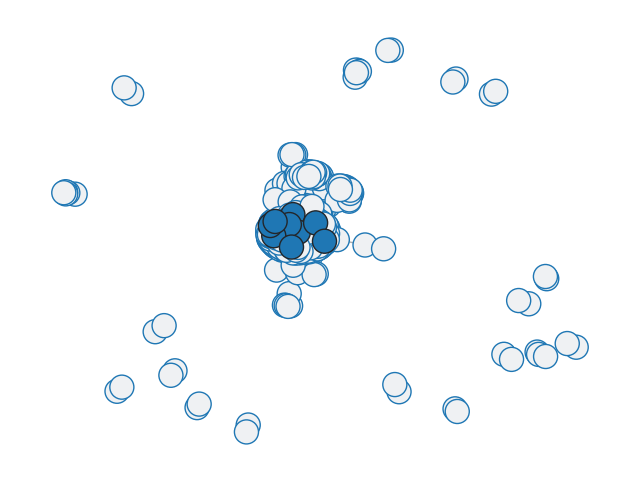

In [6]:
#g_dac, g_aspl, g_dia, g_clustering = operate_on_graph(G)
#print("The assortativity co-efficient of the network is :", g_dac)
core_periphery_detection(G)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),


{'UETH': 0.20075692930375105, 'ULCK': 0.06666944664137102, 'WISE': 0.006438453218647518, 'WETH': 0.5553026127158608, 'USDC': 0.2328508653446201, 'DAI': 0.6076744956278768, 'USDT': 0.41023783224555066, 'DELTA': -0.01691200157818618, 'FNK': 0.4467645522260941, 'RK:ETH': 0.15614981558333013, 'ROOT': 0.19611754358007497, 'MC': 0.5885503566664374, 'UNI': 0.06585208773841164, 'PAXG': 0.002904263365353947, 'ETH2POS': 0.07732431963964925, 'DC': 0.30725986000217537, 'FEI': 0.021670922010827025, 'TRIBE': 0.5069974723716799, 'FXS': 0.4847783151196157, 'FRAX': 0.21171490621398417, 'DBL': 0.3122374588176952, 'BLUE': 0.48008817698225964, 'ELON': 0.3121933729806015, 'HANU': 0.2553677191696353, 'GOJ': -0.014240098030692924, 'MIA': 0.005454986449641096, 'XXi': 0.015152653015260819, 'vUSD': 0.608362921116984, 'VOW': 0.026358986355497754, 'CAW': 0.007010039138275693, 'WBTC': 0.24303292541952817, 'MT': 0.0108201951262901, 'ACR': -0.008038559271479595, 'BigSB': 0.14050174339572274, 'ASTO': 0.19483219567967

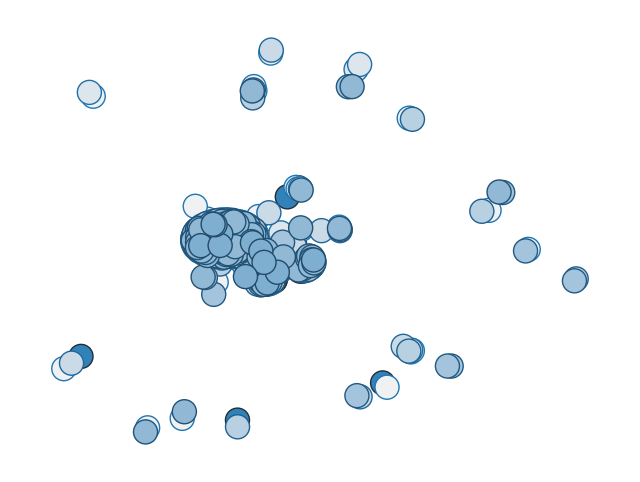

In [7]:
alg = cpnet.MINRES()
alg.detect(G)
x = alg.get_coreness()
c = alg.get_pair_id()
print(x)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax)

{'UETH': 0, 'ULCK': 0, 'WISE': 1, 'WETH': 1, 'USDC': 2, 'DAI': 3, 'USDT': 4, 'DELTA': 1, 'FNK': 4, 'RK:ETH': 5, 'ROOT': 5, 'MC': 1, 'UNI': 1, 'PAXG': 14, 'ETH2POS': 24, 'DC': 24, 'FEI': 6, 'TRIBE': 6, 'FXS': 7, 'FRAX': 7, 'DBL': 8, 'BLUE': 8, 'ELON': 1, 'HANU': 9, 'GOJ': 9, 'MIA': 9, 'XXi': 1, 'vUSD': 10, 'VOW': 10, 'CAW': 1, 'WBTC': 11, 'MT': 12, 'ACR': 12, 'BigSB': 4, 'ASTO': 2, 'M2': 13, 'wPE': 13, 'WAXE': 1, 'SUPER': 1, 'BTT': 1, 'UFO': 1, 'DAPE': 0, 'ULS': 0, 'TERA': 1, 'FOX': 1, 'eXRD': 2, 'FLX': 2, 'HIGH': 1, 'SHINJA': 1, 'RAD': 2, 'STARL': 1, 'ERN': 1, 'DG': 2, 'CULT': 1, 'WOO': 2, 'VOLT': 1, 'BOND': 2, 'SAITAMA': 1, 'O': 3, 'PNK': 1, 'ShibDoge': 1, 'HEZ': 3, 'DFI': 4, 'WILD': 1, 'RAI': 1, 'X2Y2': 1, 'AMPL': 16, 'DOGE': 4, 'FLOKI': 1, 'LINK': 1, 'UNIX': 2, 'SAND': 20, 'LON': 1, 'WDOGE': 1, 'QOM': 1, 'PAX': 14, 'SWFL': 1, 'RLY': 1, '⚗️': 1, 'POLS': 1, 'XFI': 1, 'XFIT': 4, 'AUDIO': 1, 'MMAI': 1, 'GLM': 3, 'BHNY': 13, 'INU': 3, 'DEXT': 1, 'ALPHA': 1, 'WCI': 1, 'BREED': 1, 'DETS': 

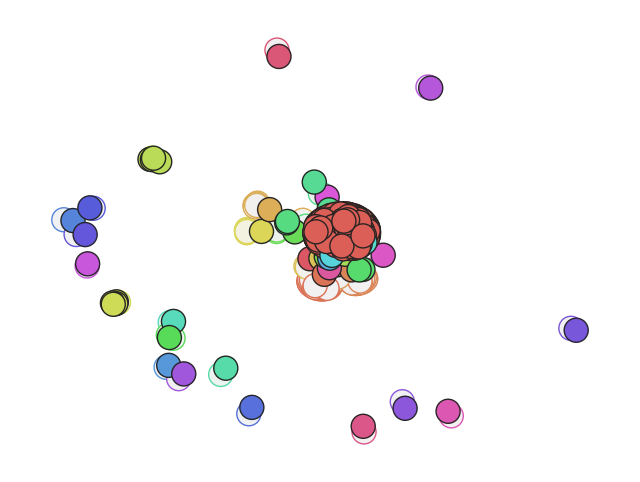

In [8]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)
c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()
print(c)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax)

/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:96: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
  0%|          | 0/100 [00:00<?, ?it/s]/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:35: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Ar = sparse.csr_matrix(nx.adjacency_matrix(Gr))
100%|██████████| 100/100 [00:15<00:00,  6.41it/s]
/Users/prakharbhandari/opt/miniconda3/lib/python3.9/site-packages/cpnet/qstest.py:146: RuntimeWarning: overflow encountered in

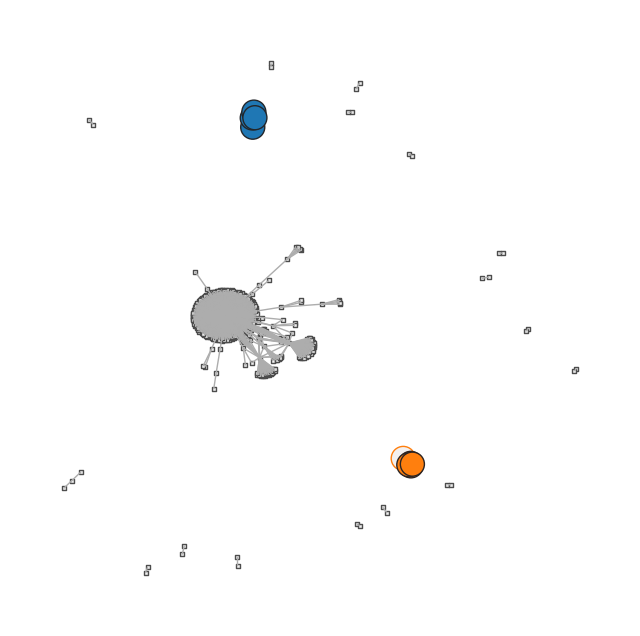

In [9]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=1
)
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

Power Law

In [15]:
def degree_array(g: nx.Graph) -> np.array:
    """
    List of degrees of a nx.Graph
    """
    return np.array([degree for node, degree in g.degree()])


def average_degree(g: nx.Graph) -> np.float64:
    """
    Average degree ⟨k⟩ of a network.
    """
    return np.mean(degree_array(g))

def linear_spacing(array):
    return np.linspace(min(array), max(array), len(array))


def power_law_fn(x, alpha):
    return x ** (-alpha)


def poisson(k, lam):
    return (lam**k / factorial(k)) * np.exp(-lam)


def exponential(k, lam):
    return (1 / lam) * np.exp(-k / lam)

def print_degree_distribution(g):
    sorted_degrees = np.sort(degree_array(g))
    avg_degree = average_degree(g)
    spacing = linear_spacing(sorted_degrees)

    fit = powerlaw.Fit(sorted_degrees, discrete=True)
    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    print("alpha: {}".format(alpha))
    print("error: {}".format(sigma))
    print("avg degree: {}".format(avg_degree))

    powerlaw.plot_pdf(
        sorted_degrees, color="b", marker="o", label="empirical degree dist"
    )
    plt.plot(spacing, power_law_fn(spacing, alpha), label="power_law_fit")
    plt.plot(spacing, exponential(spacing, avg_degree), label="exponential")
    plt.plot(spacing, poisson(spacing, avg_degree), label="poisson")
    plt.grid(True, which="both", ls="-")
    plt.ylim(10 ** (-10), 1)
    plt.xlabel("degree")
    plt.ylabel("density")
    plt.title("Degree distributions of the DeFi Network")
    plt.legend()
    plt.show()

Calculating best minimal value for power law fit
alpha: 2.4015587022212843
error: 0.16183805880250418
avg degree: 2.1049250535331905


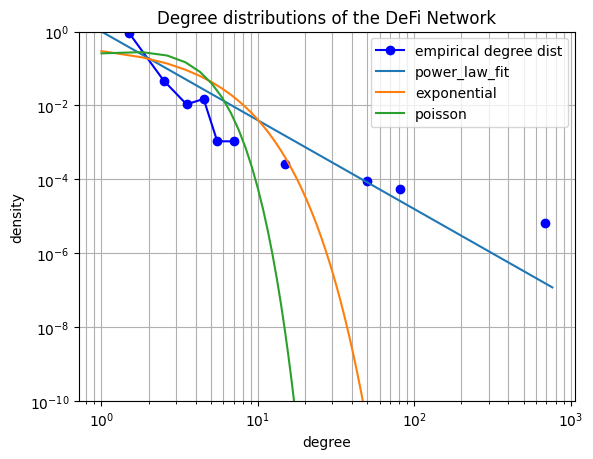

In [16]:
print_degree_distribution(G)